In [1]:
import sys
sys.path.append('C:\\0_Academy\\VScode\\00_Function\\')
import datetime
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from windrose import WindroseAxes


C:\ProgramData\Anaconda3\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
C:\ProgramData\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\ProgramData\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
C:\ProgramData\Anaconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc

In [2]:
#read file
from A1_read_data import read_csv_data
scale = 10
#Method = ['PER','ANN','LSTM','GRU']
folder = '1.1 ALL windspeed/'
file_name = 'WIND_95m_1605-1912.csv'
data = read_csv_data(folder,file_name)

Import 'WIND_95m_1605-1912.csv'Done


In [12]:
def WindRosePLOT(DATA,month,year):
    #Initiate
    plt.ion()
    DATA = DATA[['DateTime','WS95','WD95']].copy()
    DATA.dropna(how='any',inplace=True)
    mon = ['Jan' ,'Feb','Mar','Apr',
           'May' ,'Jun','Jul','Aug',
           'Sep' ,'Oct','Nov','Dec']
    logicY= (DATA["DateTime"].apply(lambda x: x.year))==(year)
    data    = DATA[logicY].copy()
    data.reset_index(inplace=True,drop=True)
    fig = plt.figure(figsize=(18,32),facecolor='w', edgecolor='r')
    #Plotting 12 graph
    for i in range(12):
        ax = plt.subplot2grid((4,3),(int(np.floor(i/3)),int(i%3)),projection='windrose')
        logic = (data["DateTime"].apply(lambda x: x.month))==(i+1)
        wd = data['WD95'][logic]
        ws = data['WS95'][logic]
        if (np.sum(logic)!=0):
            bins = np.array([0,5,15,25])
            ax.contourf(wd, ws,nsector=32,bins=bins,
                        normed=True,cmap=cm.get_cmap('jet',20), lw=1)
        ax.tick_params(axis="x", labelsize=30)
        ax.tick_params(axis="y", labelsize=22, left=True)
        ax.set_title('{}'.format(mon[i]),fontweight='bold',size=30, pad=25)
    plt.subplots_adjust(hspace=0.1,top=0.83)
    x0, y0 =-0.70 , -0.2
    plt.legend(loc='upper center', bbox_to_anchor=(x0, y0),
          ncol=7, fancybox=True, shadow=True, fontsize=17)
    plt.show()

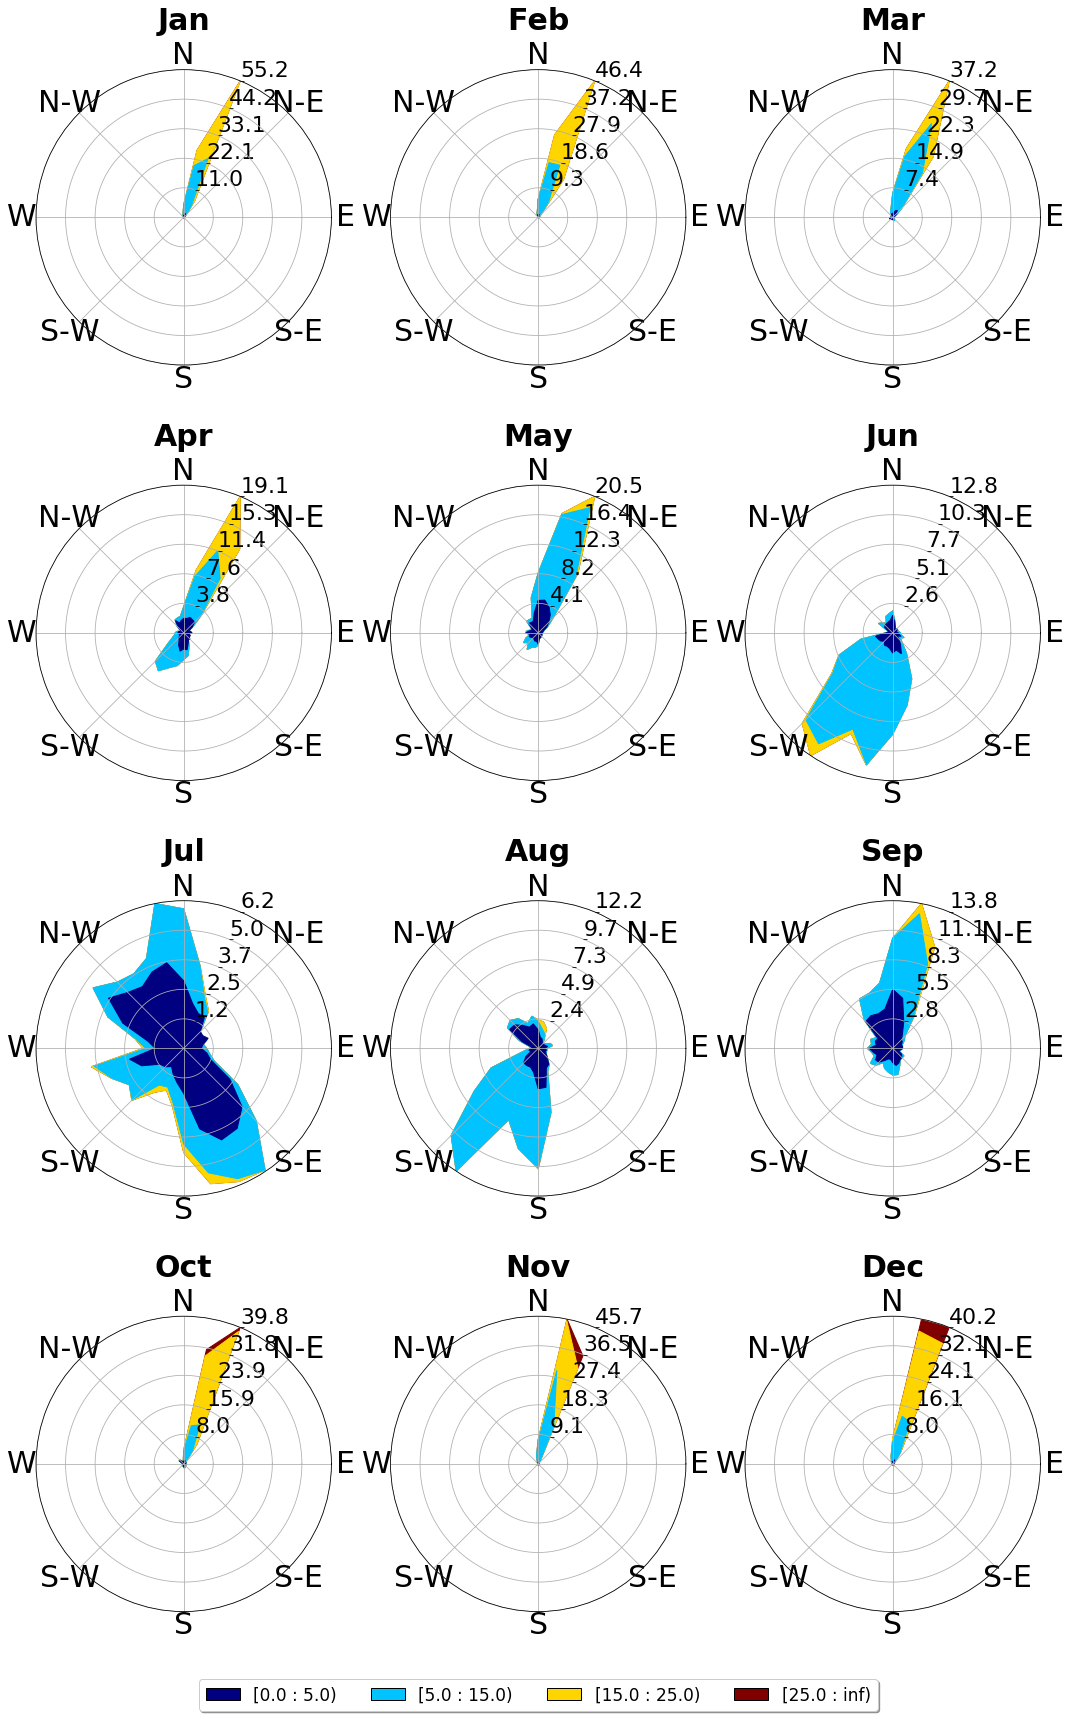

In [15]:
WindRosePLOT(data,12,2017)

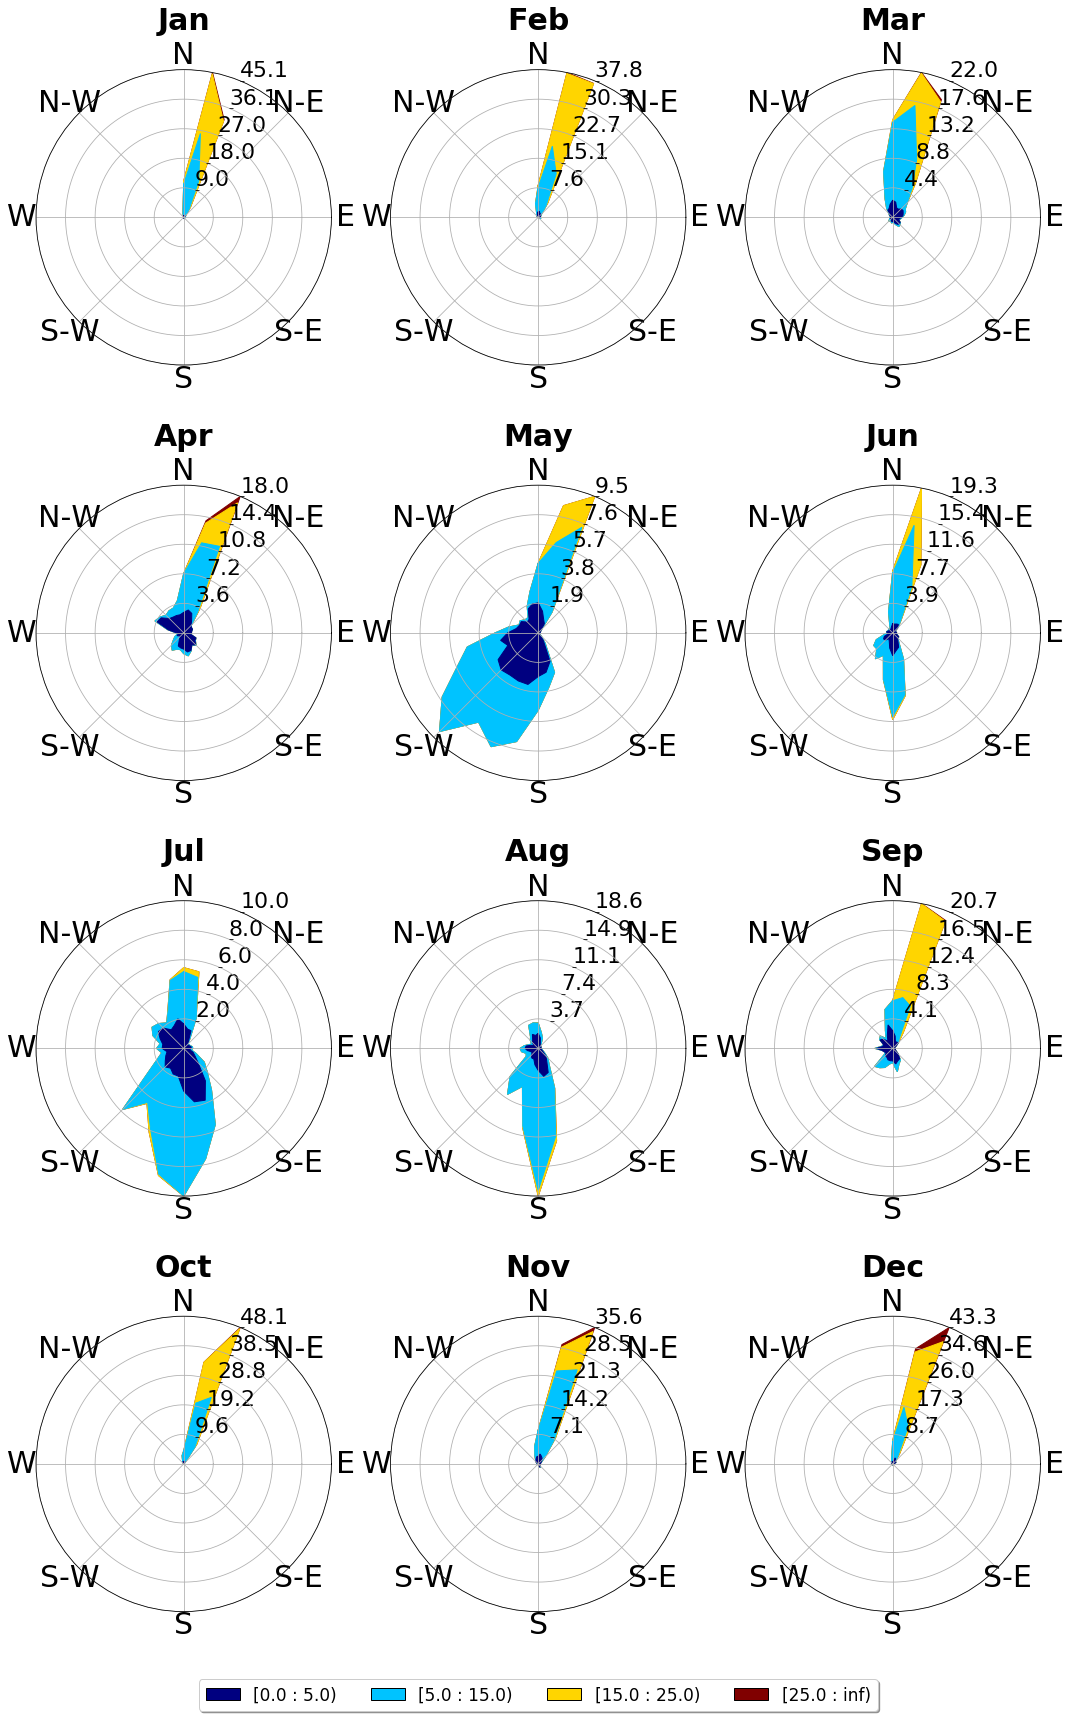

In [13]:
WindRosePLOT(data,12,2018)

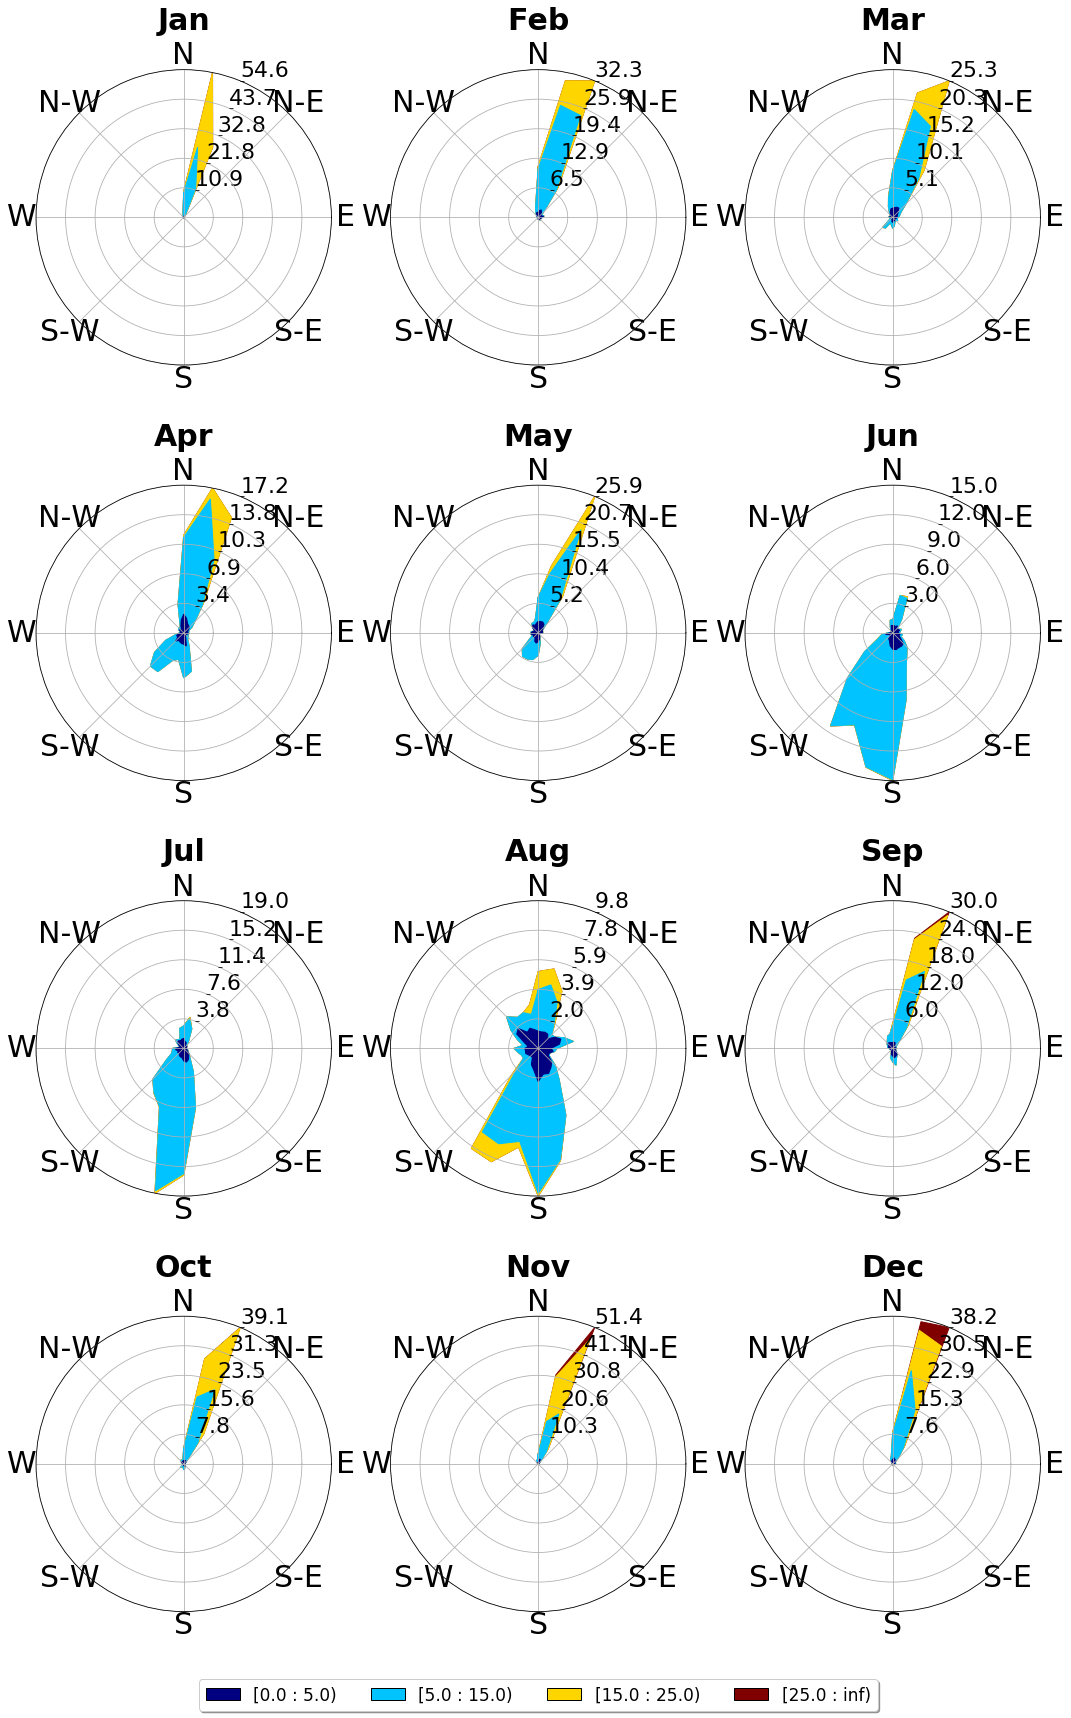

In [14]:
WindRosePLOT(data,12,2019)